In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
loan_dataset = pd.read_csv('loan_prediction_dataset.csv')


In [3]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_dataset.shape

(614, 13)

In [5]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
loan_dataset = loan_dataset.dropna()

In [8]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
loan_dataset.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
loan_dataset.replace({"Loan_Status":{'N': 0, 'Y':1}}, inplace=True)

In [63]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [65]:
loan_dataset['Dependents'].value_counts

<bound method IndexOpsMixin.value_counts of 1       1
2       0
3       0
4       0
5       2
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 480, dtype: object>

In [66]:
loan_dataset.replace({'Dependents':{'3+':4}}, inplace=True)

In [67]:
loan_dataset['Dependents'].value_counts

<bound method IndexOpsMixin.value_counts of 1      1
2      0
3      0
4      0
5      2
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 480, dtype: object>

In [74]:
loan_dataset['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of 1        Male
2        Male
3        Male
4        Male
5        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 480, dtype: object>

In [72]:
loan_dataset.replace({'Property_Area':{'Urban': 1, 'Semiurban':2, 'Rural': 3}}, inplace=True)

In [73]:
loan_dataset['Property_Area'].value_counts

<bound method IndexOpsMixin.value_counts of 1      3
2      1
3      1
4      1
5      1
      ..
609    3
610    3
611    1
612    1
613    2
Name: Property_Area, Length: 480, dtype: int64>

In [128]:
loan_dataset.replace({'Gender':{'Male': 1, 'Female': 0},
                      'Married':{'Yes':1, 'No':0 },
                      'Education': {'Graduate':1,'Not Graduate':0},
                    'Self_Employed':{'Yes':1, 'No':0}},inplace=True)

In [129]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Married', ylabel='count'>

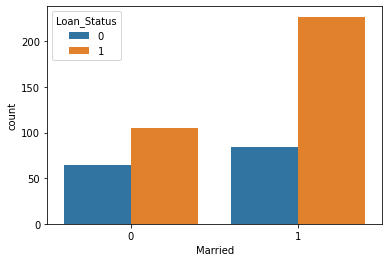

In [85]:
sns.countplot(x = 'Married', hue ='Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

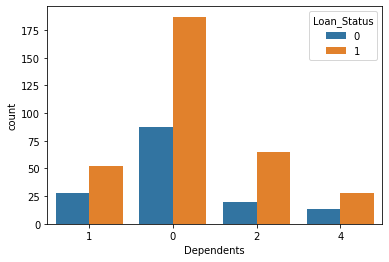

In [88]:
sns.countplot(x = 'Dependents', hue= 'Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Education', ylabel='count'>

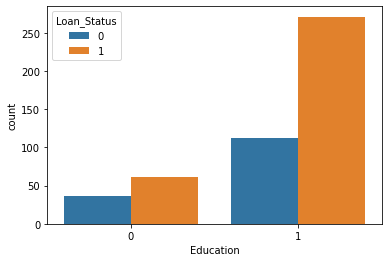

In [89]:
sns.countplot(x = 'Education', hue = 'Loan_Status', data=loan_dataset)

In [93]:
X = loan_dataset.drop(['Loan_ID', 'Loan_Status'],axis = 1)

In [115]:
Y = loan_dataset['Loan_Status']

In [101]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,test_size=0.1, stratify=Y, random_state=2)

In [104]:
model = svm.SVC(kernel='linear')

In [105]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [108]:
model_prediction_train = model.predict(X_train)
model_accuracy = accuracy_score(model_prediction_train, Y_train)
model_accuracy

0.7777777777777778

In [114]:
model_prediction_test = model.predict(X_test)
test_model_accuracy = accuracy_score(model_prediction_test, Y_test)
test_model_accuracy

0.8333333333333334